Exploratory Data Analysis (EDA) and Data Preprocessing

In [174]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# Load the dataset
df = pd.read_csv('/Users/ankushbhatt/Desktop/Assignment_FDA/Dataset/daily-minimum-temperatures-in-me.csv')
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [176]:
# check the missing values
df.isnull().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [177]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [178]:
# Convert the 'Daily minimum temperatures' column into float type
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')

In [179]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y') 

In [180]:
# check the statistical properties
df.describe()

,Date,Daily minimum temperatures
count,3650,3647.00
mean,1985-12-31 07:12:00,11.19
min,1981-01-01 00:00:00,0.00
25%,1983-07-02 06:00:00,8.30
50%,1985-12-31 12:00:00,11.00
75%,1988-06-30 18:00:00,14.00
max,1990-12-31 00:00:00,26.30
std,NaN,4.06


In [181]:
# check unique values
df.nunique()

Date                          3650
Daily minimum temperatures     227
dtype: int64

In [182]:
# In 'Daily minimum temperatures' column - need only 2 values after decimal point
pd.set_option('display.float_format', lambda x: '%.2f' % x)

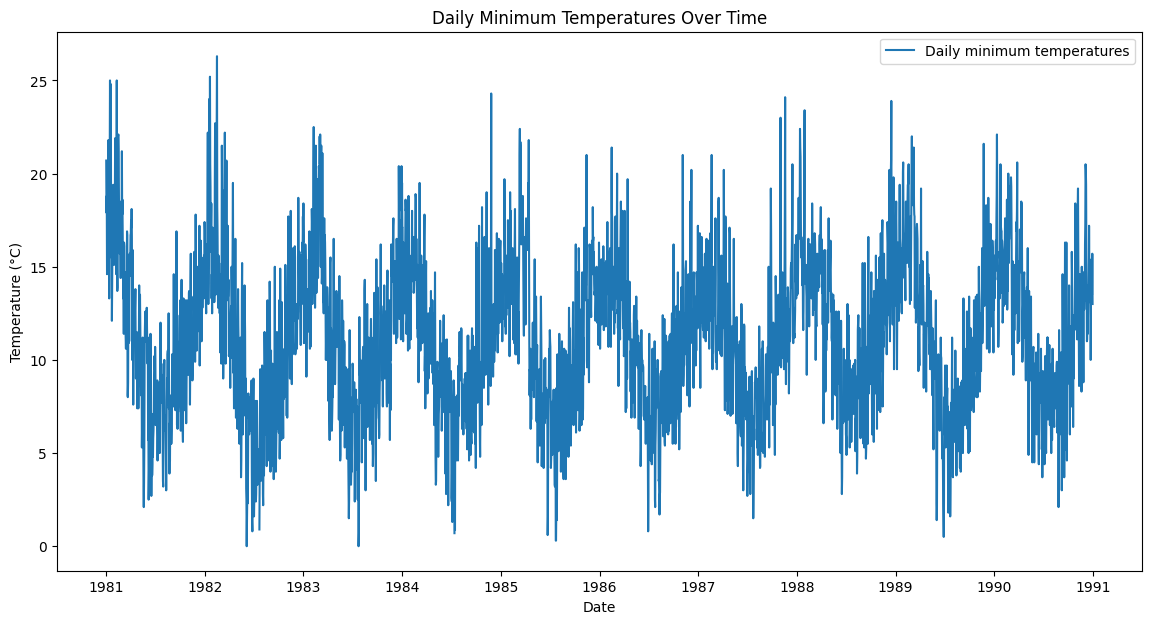

In [183]:
# Visualise trends in the data
from matplotlib import pyplot as plt


plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Daily minimum temperatures'], label = 'Daily minimum temperatures')
plt.title('Daily Minimum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [184]:
df.corr()

,Date,Daily minimum temperatures
Date,1.00,0.01
Daily minimum temperatures,0.01,1.00


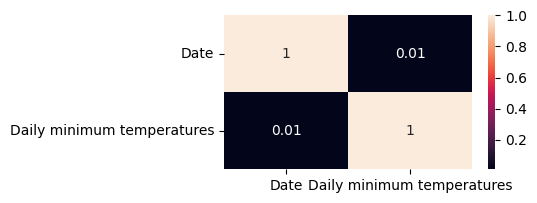

In [185]:
# correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [186]:
# group by temperature to see the occurences of each temperature 
grouped = df.groupby('Daily minimum temperatures').size()
print(grouped)


Daily minimum temperatures
0.00     2
0.30     2
0.50     1
0.60     1
0.70     2
        ..
24.30    1
24.80    1
25.00    2
25.20    1
26.30    1
Length: 227, dtype: int64


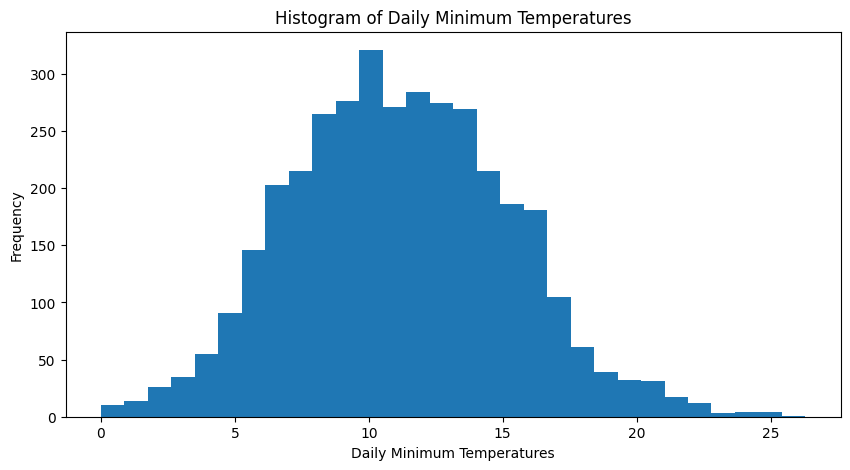

In [187]:
# Visualize this groupby with histogram
plt.figure(figsize=(10,5))
plt.hist(df['Daily minimum temperatures'], bins=30)
plt.xlabel('Daily Minimum Temperatures')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Minimum Temperatures')
plt.show()

In [188]:
# find the outliers using IQR method
Q1 = df['Daily minimum temperatures'].quantile(0.25)
Q3 = df['Daily minimum temperatures'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Daily minimum temperatures']<lower_bound) | (df['Daily minimum temperatures']>upper_bound)
print(f"Number of Outliers: {len(df[outliers])}")
print(df[outliers])

Number of Outliers: 13
           Date  Daily minimum temperatures
14   1981-01-15                       25.00
17   1981-01-18                       24.80
39   1981-02-09                       25.00
381  1982-01-17                       24.00
384  1982-01-20                       25.20
403  1982-02-08                       22.70
409  1982-02-14                       22.80
410  1982-02-15                       26.30
1425 1984-11-26                       24.30
2495 1987-11-02                       23.00
2512 1987-11-19                       24.10
2584 1988-01-30                       23.40
2905 1988-12-16                       23.90


In [189]:
# Tackle the outliers by capping them
df['Daily minimum temperatures'] = np.where(df['Daily minimum temperatures'] < lower_bound, lower_bound, df['Daily minimum temperatures'])
df['Daily minimum temperatures'] = np.where(df['Daily minimum temperatures'] > upper_bound, upper_bound, df['Daily minimum temperatures'])
df


,Date,Daily minimum temperatures
0,1981-01-01,20.70
1,1981-01-02,17.90
2,1981-01-03,18.80
3,1981-01-04,14.60
4,1981-01-05,15.80
...,...,...
3645,1990-12-27,14.00
3646,1990-12-28,13.60
3647,1990-12-29,13.50
3648,1990-12-30,15.70


In [190]:
# Statistical summary after handling outliers
df.describe()

,Date,Daily minimum temperatures
count,3650,3647.00
mean,1985-12-31 07:12:00,11.18
min,1981-01-01 00:00:00,0.00
25%,1983-07-02 06:00:00,8.30
50%,1985-12-31 12:00:00,11.00
75%,1988-06-30 18:00:00,14.00
max,1990-12-31 00:00:00,22.55
std,NaN,4.04


Feature Engineering

In [191]:
# Do feature engineering and add relevant new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.dayofweek
df['Week of Year'] = df['Date'].dt.isocalendar().week
df['Day of Year'] = df['Date'].dt.dayofyear
df


,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year
0,1981-01-01,20.70,1981,1,1,3,1,1
1,1981-01-02,17.90,1981,1,2,4,1,2
2,1981-01-03,18.80,1981,1,3,5,1,3
3,1981-01-04,14.60,1981,1,4,6,1,4
4,1981-01-05,15.80,1981,1,5,0,2,5
...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361
3646,1990-12-28,13.60,1990,12,28,4,52,362
3647,1990-12-29,13.50,1990,12,29,5,52,363
3648,1990-12-30,15.70,1990,12,30,6,52,364


In [192]:
# Map the day names while keeping the day of week numeric version
days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['Day Name'] = df['Day of Week'].map(days)
df

,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday
...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday


In [193]:
# Build Seasonal features 
def get_season(month):
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
df

,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name,Season
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday,Winter
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday,Winter
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday,Winter
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday,Winter
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday,Winter
...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday,Winter
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday,Winter
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday,Winter
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday,Winter


In [194]:
# Build cyclical features for 'Month' and 'Day of Week', so that our machine learning
# models can understand the cyclical nature of these features.

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Now do for Days of Week
df['DayofWeek_sin'] = np.sin(2 * np.pi * df['Day of Week'] / 7)
df['DayofWeek_cos'] = np.cos(2 * np.pi * df['Day of Week'] / 7)

df

,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name,Season,Month_sin,Month_cos,DayofWeek_sin,DayofWeek_cos
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday,Winter,0.50,0.87,0.43,-0.90
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday,Winter,0.50,0.87,-0.43,-0.90
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday,Winter,0.50,0.87,-0.97,-0.22
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday,Winter,0.50,0.87,-0.78,0.62
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday,Winter,0.50,0.87,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday,Winter,-0.00,1.00,0.43,-0.90
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday,Winter,-0.00,1.00,-0.43,-0.90
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday,Winter,-0.00,1.00,-0.97,-0.22
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday,Winter,-0.00,1.00,-0.78,0.62


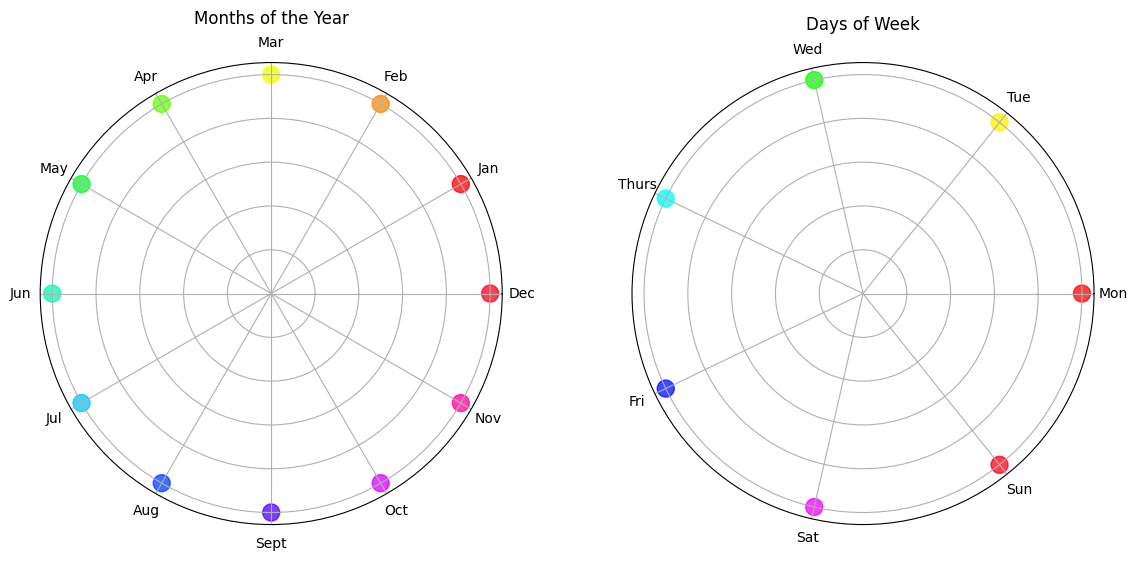

In [195]:
# create the polar projections of Month and Day of Week

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(14,6))

# For Month
months = np.arange(1, 13)
month_names = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
               'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
angles = 2 * np.pi * np.array(months) / 12

# plotting
ax1.scatter(angles, [1]*12, s=150, c=range(12), cmap='hsv', alpha=0.75)
ax1.set_xticks(angles)
ax1.set_xticklabels(month_names)
ax1.set_yticklabels([])
ax1.set_title('Months of the Year', va = 'bottom')

# for Day of Week
days = range(7)
day_names = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
angles = 2 * np.pi * np.array(days) / 7

# plotting
ax2.scatter(angles, [1]*7, s=150, c=range(7), cmap='hsv', alpha=0.75)
ax2.set_xticks(angles)
ax2.set_xticklabels(day_names)
ax2.set_yticklabels([])
ax2.set_title('Days of Week', va = 'bottom')

plt.show()


In [196]:
# Create Rolling Statistics features

df['Rolling Mean 7'] = df['Daily minimum temperatures'].rolling(window=7).mean()
df['Rolling Mean 30'] = df['Daily minimum temperatures'].rolling(window=30).mean()
df['Rolling Std 7'] = df['Daily minimum temperatures'].rolling(window=7).std()
df['Rolling Std 30'] = df['Daily minimum temperatures'].rolling(window=30).std()

# temperature difference
df['Temp Diff 1d'] = df['Daily minimum temperatures'].diff(periods=1)
df['Temp Diff 7d'] = df['Daily minimum temperatures'].diff(periods=7)

df

,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name,Season,Month_sin,Month_cos,DayofWeek_sin,DayofWeek_cos,Rolling Mean 7,Rolling Mean 30,Rolling Std 7,Rolling Std 30,Temp Diff 1d,Temp Diff 7d
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday,Winter,0.50,0.87,0.43,-0.90,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday,Winter,0.50,0.87,-0.43,-0.90,NaN,NaN,NaN,NaN,-2.80,NaN
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday,Winter,0.50,0.87,-0.97,-0.22,NaN,NaN,NaN,NaN,0.90,NaN
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday,Winter,0.50,0.87,-0.78,0.62,NaN,NaN,NaN,NaN,-4.20,NaN
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday,Winter,0.50,0.87,0.00,1.00,NaN,NaN,NaN,NaN,1.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday,Winter,-0.00,1.00,0.43,-0.90,13.10,14.39,1.49,2.53,-0.60,-1.40
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday,Winter,-0.00,1.00,-0.43,-0.90,13.17,14.35,1.50,2.53,-0.40,0.50
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday,Winter,-0.00,1.00,-0.97,-0.22,13.21,14.31,1.51,2.54,-0.10,0.30
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday,Winter,-0.00,1.00,-0.78,0.62,13.47,14.41,1.78,2.53,2.20,1.80


In [197]:
# Fill missing temperatures values with interpolation method

df['Daily minimum temperatures'] = df['Daily minimum temperatures'].interpolate(method='linear')

# Now recalculate the rolling statistics columns
df['Rolling Mean 7'] = df['Daily minimum temperatures'].rolling(window=7).mean()
df['Rolling Mean 30'] = df['Daily minimum temperatures'].rolling(window=30).mean()
df['Rolling Std 7'] = df['Daily minimum temperatures'].rolling(window=7).std()
df['Rolling Std 30'] = df['Daily minimum temperatures'].rolling(window=30).std()

# If is there any missing values in Rolling statistics columns, so fill them again
df['Rolling Mean 7'] = df['Rolling Mean 7'].fillna(df['Daily minimum temperatures'])
df['Rolling Mean 30'] = df['Rolling Mean 30'].fillna(df['Daily minimum temperatures'])
df['Rolling Std 7'] = df['Rolling Std 7'].fillna(0)
df['Rolling Std 30'] = df['Rolling Std 30'].fillna(0)

df


,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name,Season,Month_sin,Month_cos,DayofWeek_sin,DayofWeek_cos,Rolling Mean 7,Rolling Mean 30,Rolling Std 7,Rolling Std 30,Temp Diff 1d,Temp Diff 7d
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday,Winter,0.50,0.87,0.43,-0.90,20.70,20.70,0.00,0.00,NaN,NaN
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday,Winter,0.50,0.87,-0.43,-0.90,17.90,17.90,0.00,0.00,-2.80,NaN
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday,Winter,0.50,0.87,-0.97,-0.22,18.80,18.80,0.00,0.00,0.90,NaN
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday,Winter,0.50,0.87,-0.78,0.62,14.60,14.60,0.00,0.00,-4.20,NaN
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday,Winter,0.50,0.87,0.00,1.00,15.80,15.80,0.00,0.00,1.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday,Winter,-0.00,1.00,0.43,-0.90,13.10,14.39,1.49,2.53,-0.60,-1.40
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday,Winter,-0.00,1.00,-0.43,-0.90,13.17,14.35,1.50,2.53,-0.40,0.50
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday,Winter,-0.00,1.00,-0.97,-0.22,13.21,14.31,1.51,2.54,-0.10,0.30
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday,Winter,-0.00,1.00,-0.78,0.62,13.47,14.41,1.78,2.53,2.20,1.80


In [198]:
# Verify to missing values again

df.isnull().sum()

Date                           0
Daily minimum temperatures     0
Year                           0
Month                          0
Day                            0
Day of Week                    0
Week of Year                   0
Day of Year                    0
Day Name                       0
Season                         0
Month_sin                      0
Month_cos                      0
DayofWeek_sin                  0
DayofWeek_cos                  0
Rolling Mean 7                 0
Rolling Mean 30                0
Rolling Std 7                  0
Rolling Std 30                 0
Temp Diff 1d                   6
Temp Diff 7d                  13
dtype: int64

In [199]:
# lag features

# Daily lags
df['Lag 1'] = df['Daily minimum temperatures'].shift(1)
df['Lag 2'] = df['Daily minimum temperatures'].shift(2)
df['Lag 3'] = df['Daily minimum temperatures'].shift(3)

# Weekly lags
df['Lag 7'] = df['Daily minimum temperatures'].shift(7)
df['Lag 14'] = df['Daily minimum temperatures'].shift(14)

# Monthly lag
df['Lag 30'] = df['Daily minimum temperatures'].shift(30)

df

,Date,Daily minimum temperatures,Year,Month,Day,Day of Week,Week of Year,Day of Year,Day Name,Season,...,Rolling Std 7,Rolling Std 30,Temp Diff 1d,Temp Diff 7d,Lag 1,Lag 2,Lag 3,Lag 7,Lag 14,Lag 30
0,1981-01-01,20.70,1981,1,1,3,1,1,Thursday,Winter,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.90,1981,1,2,4,1,2,Friday,Winter,...,0.00,0.00,-2.80,NaN,20.70,NaN,NaN,NaN,NaN,NaN
2,1981-01-03,18.80,1981,1,3,5,1,3,Saturday,Winter,...,0.00,0.00,0.90,NaN,17.90,20.70,NaN,NaN,NaN,NaN
3,1981-01-04,14.60,1981,1,4,6,1,4,Sunday,Winter,...,0.00,0.00,-4.20,NaN,18.80,17.90,20.70,NaN,NaN,NaN
4,1981-01-05,15.80,1981,1,5,0,2,5,Monday,Winter,...,0.00,0.00,1.20,NaN,14.60,18.80,17.90,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990-12-27,14.00,1990,12,27,3,52,361,Thursday,Winter,...,1.49,2.53,-0.60,-1.40,14.60,12.90,10.00,15.40,11.40,8.80
3646,1990-12-28,13.60,1990,12,28,4,52,362,Friday,Winter,...,1.50,2.53,-0.40,0.50,14.00,14.60,12.90,13.10,12.50,14.70
3647,1990-12-29,13.50,1990,12,29,5,52,363,Saturday,Winter,...,1.51,2.54,-0.10,0.30,13.60,14.00,14.60,13.20,13.40,14.70
3648,1990-12-30,15.70,1990,12,30,6,52,364,Sunday,Winter,...,1.78,2.53,2.20,1.80,13.50,13.60,14.00,13.90,13.60,12.70


In [200]:
# handle missing values in lag features

mean_temp = df['Daily minimum temperatures'].mean()
for col in ['Lag 1', 'Lag 2', 'Lag 3', 'Lag 7', 'Lag 14', 'Lag 30']:
    df[col] = df[col].fillna(mean_temp)


In [201]:
# Round the floating values to 2 decimal points

for col in df.select_dtypes(include=['float']).columns:
    df[col] = df[col].round(2)

In [202]:
# Finding outliers after creating all features
Q1 = df.select_dtypes(include=['float', 'int']).quantile(0.25)
Q3 = df.select_dtypes(include=['float', 'int']).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to identify outliers
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
mask = pd.DataFrame(False, index=df.index, columns=df.columns)

for col in numeric_columns:
    mask[col] = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])

# Count outliers in any column
has_outlier = mask.any(axis=1)
outlier_count = has_outlier.sum()
print(f"Number of rows with outliers: {outlier_count}")

# Display rows with outliers
outliers = df[has_outlier]
print(outliers)

Number of rows with outliers: 226
           Date  Daily minimum temperatures  Year  Month  Day  Day of Week  \
0    1981-01-01                       20.70  1981      1    1            3   
1    1981-01-02                       17.90  1981      1    2            4   
2    1981-01-03                       18.80  1981      1    3            5   
3    1981-01-04                       14.60  1981      1    4            6   
4    1981-01-05                       15.80  1981      1    5            0   
...         ...                         ...   ...    ...  ...          ...   
3073 1989-06-03                        2.10  1989      6    3            5   
3074 1989-06-04                        6.60  1989      6    4            6   
3191 1989-09-29                       11.90  1989      9   29            4   
3554 1990-09-27                        4.60  1990      9   27            3   
3572 1990-10-15                       15.80  1990     10   15            0   

      Week of Year  Day of Ye

In [203]:
# Handle these outliers
for col in numeric_columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

df[numeric_columns].describe()

,Daily minimum temperatures,Year,Month,Day,Day of Week,Day of Year,Month_sin,Month_cos,DayofWeek_sin,DayofWeek_cos,...,Rolling Std 7,Rolling Std 30,Temp Diff 1d,Temp Diff 7d,Lag 1,Lag 2,Lag 3,Lag 7,Lag 14,Lag 30
count,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00,...,3650.00,3650.00,3644.00,3637.00,3650.00,3650.00,3650.00,3650.00,3650.00,3650.00
mean,11.17,1985.50,6.52,15.72,3.00,183.00,-0.00,-0.00,-0.00,-0.00,...,2.24,2.58,0.01,-0.00,11.17,11.17,11.17,11.17,11.16,11.15
std,4.05,2.87,3.45,8.80,2.00,105.38,0.71,0.71,0.70,0.71,...,0.84,0.51,2.67,3.67,4.05,4.05,4.05,4.05,4.04,4.03
min,0.00,1981.00,1.00,1.00,0.00,1.00,-1.00,-1.00,-0.97,-0.90,...,0.00,1.11,-6.80,-9.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,8.30,1983.00,4.00,8.00,1.00,92.00,-0.87,-0.87,-0.78,-0.90,...,1.61,2.20,-1.70,-2.40,8.30,8.30,8.30,8.30,8.30,8.30
50%,11.00,1985.50,7.00,16.00,3.00,183.00,-0.00,0.00,0.00,-0.22,...,2.12,2.60,0.20,0.10,11.00,11.00,11.00,11.00,11.00,11.00
75%,14.00,1988.00,10.00,23.00,5.00,274.00,0.50,0.87,0.78,0.62,...,2.77,2.93,1.70,2.40,14.00,14.00,14.00,14.00,13.90,13.90
max,22.55,1990.00,12.00,31.00,6.00,365.00,1.00,1.00,0.97,1.00,...,4.51,4.03,6.80,9.60,22.55,22.55,22.55,22.55,22.30,22.30


In [204]:
# save the processed dataset

df.to_csv('processed_temperatures_dataset.csv', index=False)

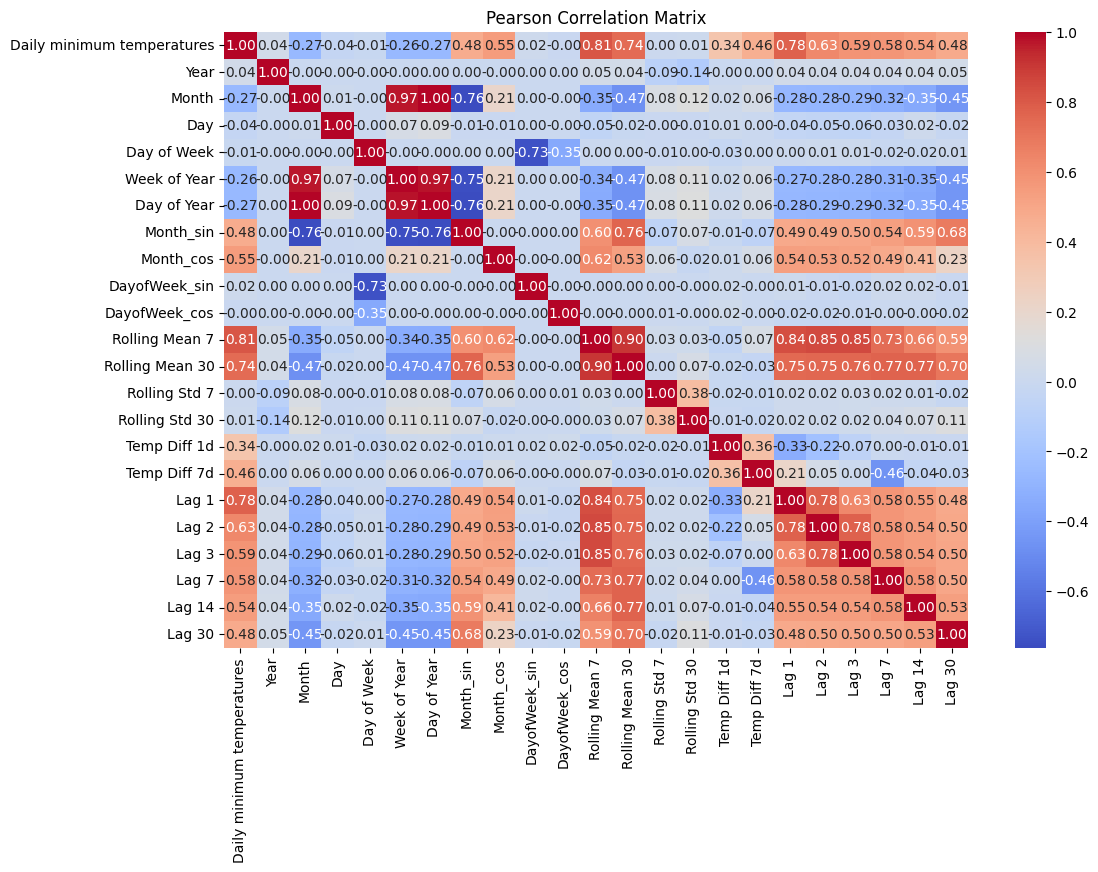

In [205]:
# pearson correlation matrix
new_df = pd.read_csv('processed_temperatures_dataset.csv')

plt.figure(figsize=(12,8))
numeric_df = new_df.select_dtypes(include=['float', 'int'])
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

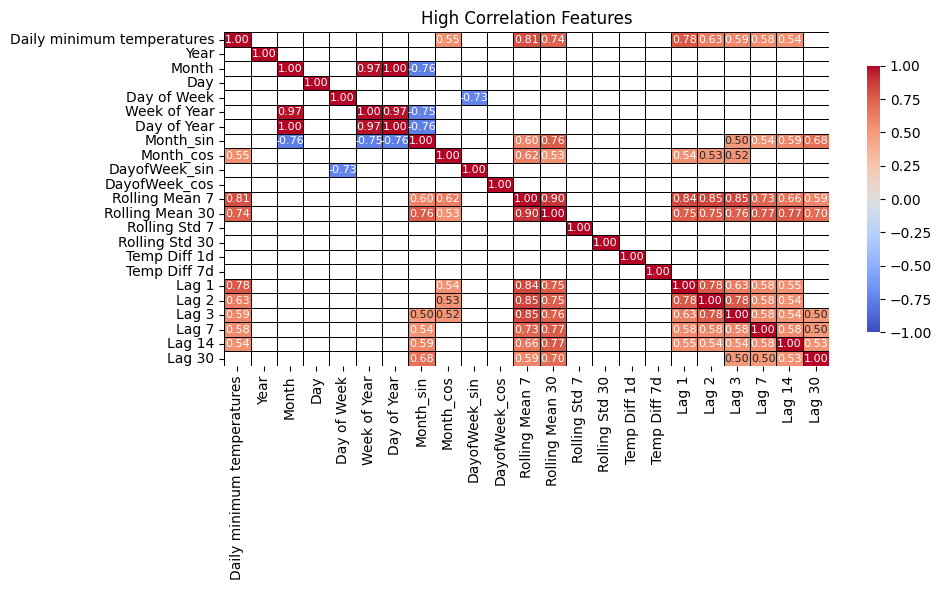

In [206]:
# preserve only high correlation features in positive correlation and in negative correlation

threshold = 0.5
high_corr_features = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
high_corr_features

# create a copy
high_corr_matrix_filled = high_corr_features.copy()

# visulaise
plt.figure(figsize=(10,6))
sns.heatmap(high_corr_matrix_filled, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linecolor='black', linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})
plt.title('High Correlation Features')
plt.tight_layout()
plt.show()

/var/folders/6k/zvmp20g90bg25lxsx808bjkh0000gn/T/ipykernel_21185/1756254794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Daily minimum temperatures', data=new_df, palette='coolwarm_r', linewidth=1.2,
/var/folders/6k/zvmp20g90bg25lxsx808bjkh0000gn/T/ipykernel_21185/1756254794.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_names, rotation=0, fontsize=10, color='white')


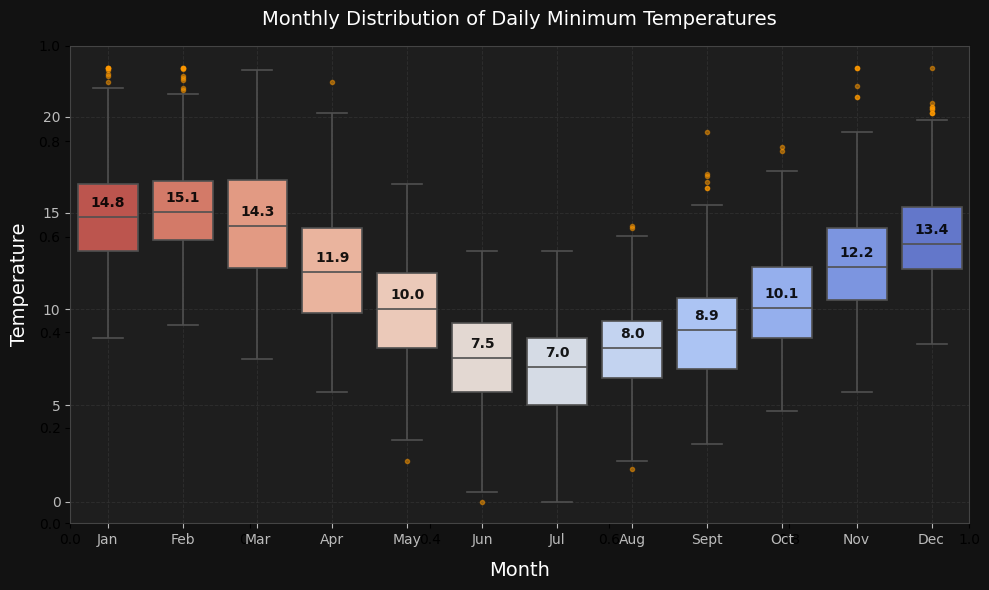

In [207]:
# Visualise seasonal trends in the data
fig, ax = plt.subplots(figsize=(10,6), facecolor='#121212')
ax = plt.axes(facecolor='#1e1e1e')

# create boxplot with custom palette
sns.boxplot(x='Month', y='Daily minimum temperatures', data=new_df, palette='coolwarm_r', linewidth=1.2, 
            fliersize=3, flierprops={'marker': 'o', 'markerfacecolor': '#ff9900',
                       'markeredgecolor':'#ff9900','alpha': 0.5})

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names, rotation=0, fontsize=10, color='white')

# style the borders
for spine in ax.spines.values():
    spine.set_color('#444444')

# title and labels
ax.set_title('Monthly Distribution of Daily Minimum Temperatures', fontsize=14, color='white', pad=15)
ax.set_xlabel('Month', color='white', fontsize=14, labelpad=10)
ax.set_ylabel('Temperature', color='white', fontsize=14, labelpad=10)

# grid
ax.grid(color='#333333', linestyle='--', linewidth=0.7, alpha=0.7)
ax.tick_params(colors='#bbbbbb', which='both')

# add temperature median values for each month 
medians = df.groupby('Month')['Daily minimum temperatures'].median().values
for i, median in enumerate(medians):
    ax.annotate(f'{median:.1f}',
                xy=(i, median),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                va='center',
                color='#000000',
                fontweight='bold',
                alpha=0.9)

plt.tight_layout()
plt.show()

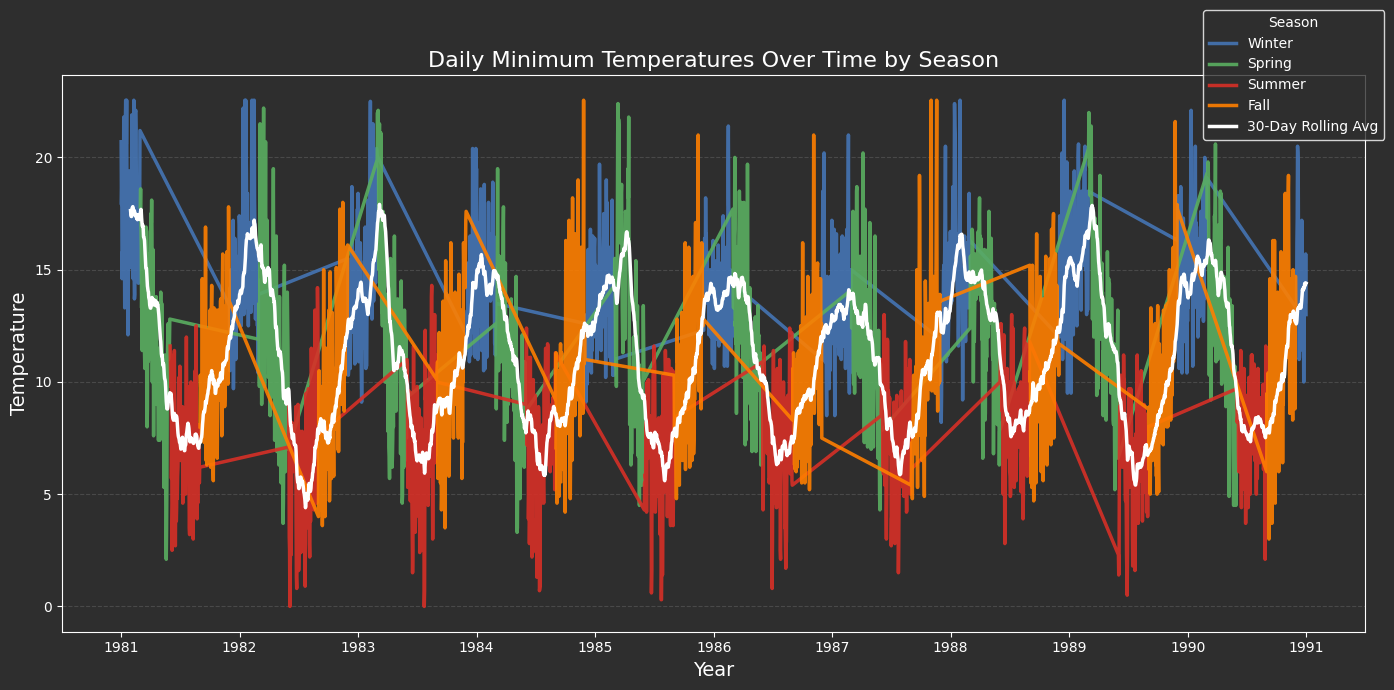

In [208]:
# visualise the temperature trends with season names with year
plt.figure(figsize=(14,7), facecolor='#2e2e2e') #dark background for figure

new_df['Date'] = pd.to_datetime(new_df['Date'])

# Sort by date for proper rolling calculation
new_df = new_df.sort_values('Date')

# Calculate 30-day rolling average
new_df['Rolling Avg 30'] = new_df['Daily minimum temperatures'].rolling(window=30).mean()

dark_palette = {
    'Winter': '#4575b4', #deep blue
    'Spring': '#5aae61', # green
    'Summer': '#d73027', #red
    'Fall': '#ff7f00' # orange
}
ax = sns.lineplot(x='Date', y='Daily minimum temperatures', hue='Season', data=new_df, palette=dark_palette, 
                  markers=True, errorbar=None, alpha=0.9, linewidth=2.5)

# Plot rolling average line (overall trend)
sns.lineplot(x='Date', y='Rolling Avg 30', data=new_df, color='white', 
             label='30-Day Rolling Avg', linewidth=2.5, ax=ax)

# customize the plot with dark theme
plt.title('Daily Minimum Temperatures Over Time by Season', fontsize=16, color='white')
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Temperature', fontsize=14, color='white')

#style the plot for the dark theme
ax.set_facecolor('#2e2e2e')
ax.grid(axis='y', color='#555555', linestyle='--', alpha=0.7)  # Grid only on y-axis
ax.grid(axis='x', visible=False)  # Turn off x-axis grid lines
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(colors='white')

# customize legend
legend = plt.legend(title='Season', frameon=True, loc='right', bbox_to_anchor=(1.02, 1))
legend.get_frame().set_facecolor('#2e2e2e')
legend.get_frame().set_edgecolor('white')
legend.get_title().set_color('white')

# change legend text color
for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()
plt.show()

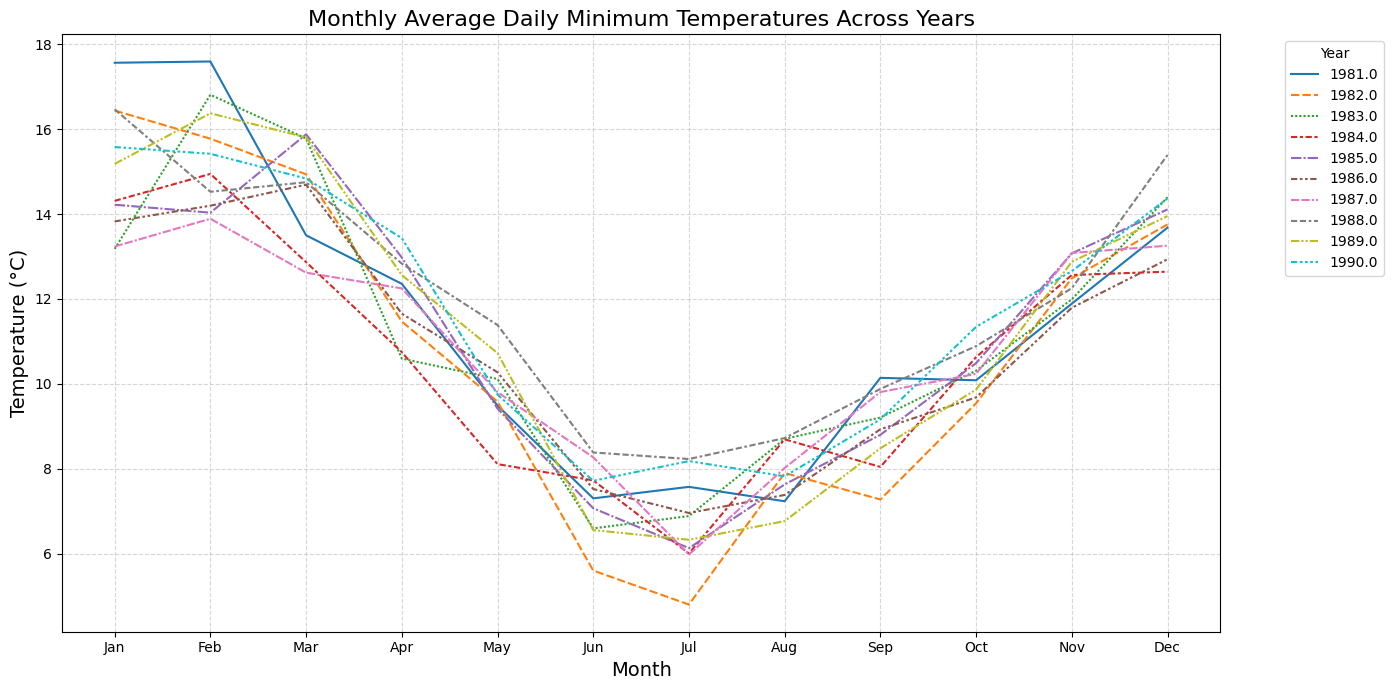

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is datetime
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Group by Year and Month, calculate average temperature
monthly_avg = new_df.groupby(['Year', 'Month'])['Daily minimum temperatures'].mean().reset_index()

# Pivot for heatmap or lineplot
monthly_pivot = monthly_avg.pivot(index='Month', columns='Year', values='Daily minimum temperatures')

# Plot: Lineplot of monthly trends across years
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_pivot)
plt.title('Monthly Average Daily Minimum Temperatures Across Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Model Development and Evaluation

In [225]:
# Apply LSTM model step by step
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


In [211]:
# prepare the data for LSTM Model
feature_cols = ['Year', 'Month_sin', 'Month_cos', 'DayofWeek_sin', 'DayofWeek_cos', 'Rolling Mean 7', 'Rolling Mean 30',
                'Rolling Std 7', 'Rolling Std 30', 'Temp Diff 1d', 'Temp Diff 7d', 'Lag 1', 'Lag 2',
                'Lag 3', 'Lag 7', 'Lag 14', 'Lag 30', 'Season', 'Day Name']
            
X = df[feature_cols]

# one hot encode for categorical features using pandas
X = pd.get_dummies(X, columns=['Season', 'Day Name'], drop_first=True, dtype=int)
X


,Year,Month_sin,Month_cos,DayofWeek_sin,DayofWeek_cos,Rolling Mean 7,Rolling Mean 30,Rolling Std 7,Rolling Std 30,Temp Diff 1d,...,Lag 30,Season_Spring,Season_Summer,Season_Winter,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
0,1981.00,0.50,0.87,0.43,-0.90,20.70,20.70,0.00,1.11,NaN,...,11.17,0,0,1,0,0,0,1,0,0
1,1981.00,0.50,0.87,-0.43,-0.90,17.90,17.90,0.00,1.11,-2.80,...,11.17,0,0,1,0,0,0,0,0,0
2,1981.00,0.50,0.87,-0.97,-0.22,18.80,18.80,0.00,1.11,0.90,...,11.17,0,0,1,0,1,0,0,0,0
3,1981.00,0.50,0.87,-0.78,0.62,14.60,14.60,0.00,1.11,-4.20,...,11.17,0,0,1,0,0,1,0,0,0
4,1981.00,0.50,0.87,0.00,1.00,15.80,15.80,0.00,1.11,1.20,...,11.17,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,1990.00,-0.00,1.00,0.43,-0.90,13.10,14.39,1.49,2.53,-0.60,...,8.80,0,0,1,0,0,0,1,0,0
3646,1990.00,-0.00,1.00,-0.43,-0.90,13.17,14.35,1.50,2.53,-0.40,...,14.70,0,0,1,0,0,0,0,0,0
3647,1990.00,-0.00,1.00,-0.97,-0.22,13.21,14.31,1.51,2.54,-0.10,...,14.70,0,0,1,0,1,0,0,0,0
3648,1990.00,-0.00,1.00,-0.78,0.62,13.47,14.41,1.78,2.53,2.20,...,12.70,0,0,1,0,0,1,0,0,0


In [212]:
# target variable
y = new_df['Daily minimum temperatures'].values
y

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ], shape=(3650,))

In [213]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2920, 26), (730, 26), (2920,), (730,))

In [219]:
# scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# reshape input to be 3D [samples, timesteps, features] as required by LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
X_train_reshaped.shape, X_test_reshaped.shape


((2920, 1, 26), (730, 1, 26))

In [ ]:
# check for NaN and Inf values in the data
import numpy as np

# Replace NaNs with column-wise mean
nan_mask = np.isnan(X_train_reshaped)
col_means = np.nanmean(X_train_reshaped, axis=0)
X_train_reshaped[nan_mask] = np.take(col_means, np.where(nan_mask)[1])

print(np.isnan(X_train_reshaped).sum(), np.isinf(X_train_reshaped).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())



0 0
0 0


LSTM Model

In [251]:
# define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))

model.summary()

/Users/ankushbhatt/Desktop/Assignment_FDA/workenv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 1, 50)          │        15,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,651 (139.26 KB)

 Trainable params: 35,651 (139.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'r2_score'])

In [254]:
# after compile the model, now fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3839 - mae: 0.4603 - r2_score: 0.9769 - val_loss: 0.1294 - val_mae: 0.2388 - val_r2_score: 0.9913
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3697 - mae: 0.4476 - r2_score: 0.9777 - val_loss: 0.1155 - val_mae: 0.2261 - val_r2_score: 0.9922
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3860 - mae: 0.4562 - r2_score: 0.9768 - val_loss: 0.0957 - val_mae: 0.2089 - val_r2_score: 0.9936
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3779 - mae: 0.4560 - r2_score: 0.9773 - val_loss: 0.1401 - val_mae: 0.2537 - val_r2_score: 0.9906
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3673 - mae: 0.4495 - r2_score: 0.9779 - val_loss: 0.1074 - val_mae: 0.2149 - val_r2_score: 0.9928
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3435 - mae: 0.4367 - r2_score: 0.9793 - val_loss: 0.0885 - val_mae: 0.2068 - val_r2_score: 0.9940
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [255]:
# Evaluate the model on test data
test_loss, test_mae, test_r2 = model.evaluate(X_test_reshaped, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}\n", f"Test MAE: {test_mae:.4f}\n", f"Test R2: {test_r2:.4f}\n")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.0468 - mae: 0.1658 - r2_score: 0.9972
Test Loss: 0.0468
 Test MAE: 0.1658
 Test R2: 0.9972



In [256]:
# make predictions
y_pred = model.predict(X_test_reshaped)
y_pred

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[13.799785  ],
       [16.76004   ],
       [18.291643  ],
       [16.488804  ],
       [11.315538  ],
       [ 9.507008  ],
       [11.850009  ],
       [15.410619  ],
       [15.952733  ],
       [13.221661  ],
       [12.24416   ],
       [13.438628  ],
       [12.018888  ],
       [13.076122  ],
       [16.90079   ],
       [18.88145   ],
       [16.0031    ],
       [13.326404  ],
       [12.733312  ],
       [16.179483  ],
       [14.560412  ],
       [14.747369  ],
       [12.146883  ],
       [12.218151  ],
       [15.059718  ],
       [16.381495  ],
       [16.545197  ],
       [19.839033  ],
       [20.087885  ],
       [16.391768  ],
       [16.034794  ],
       [15.975652  ],
       [14.357638  ],
       [16.366581  ],
       [15.72384   ],
       [14.30082   ],
       [13.318707  ],
       [16.98477   ],
       [18.627172  ],
       [16.856958  ],
       [15.211477  ],
       [15.525228  ],
       [15.175295  ],
       [17.886936  ],
       [18.414562  ],
       [19

In [257]:
# save the model
model.save('LSTM_temperature_model.keras')

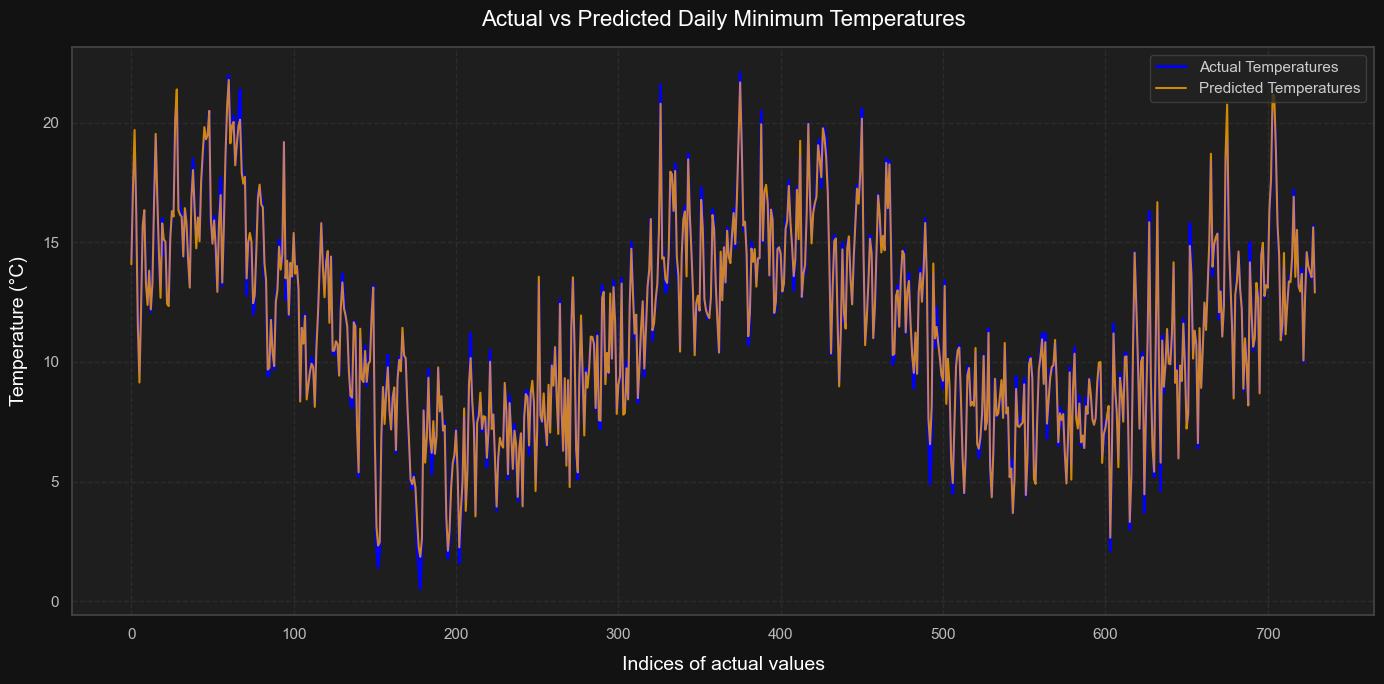

In [296]:
# visualise the predictions with actual values like how close they are

fig, ax = plt.subplots(figsize=(14, 7), facecolor='#121212')
ax.set_facecolor('#1e1e1e')

# Keep the same colors for consistency in comparison
ax.plot(y_test, label='Actual Temperatures', color='blue', linewidth=2)
ax.plot(y_pred, label='Predicted Temperatures', color='orange', alpha=0.8, linewidth=1.5)

# Add grid with dark styling
ax.grid(color='#333333', linestyle='--', alpha=0.7)

# Style the borders
for spine in ax.spines.values():
    spine.set_color('#444444')

# Title and labels with white text
ax.set_title('Actual vs Predicted Daily Minimum Temperatures', color='white', fontsize=16, pad=15)
ax.set_xlabel('Indices of actual values', color='white', fontsize=14, labelpad=10)
ax.set_ylabel('Temperature (°C)', color='white', fontsize=14, labelpad=10)

# Style tick labels
ax.tick_params(colors='#bbbbbb', which='both')

# Style legend
legend = ax.legend(frameon=True, facecolor='#232323', edgecolor='#444444', loc='upper right')
for text in legend.get_texts():
    text.set_color('#cccccc')

plt.tight_layout()
plt.show()

In [259]:
# hyperparameter tuning using GridSearchCV 

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'r2_score'])

    return model

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model = KerasRegressor(model=create_model, verbose=0, callbacks=[early_stop])

param_grid = {
    'model__units': [50],
    'model__dropout_rate': [0.2],
    'epochs': [30, 50],
    'batch_size': [32]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, scoring='r2')
grid_result = grid.fit(X_train_reshaped, y_train)

print(f"Best R2 Score: {grid_result.best_score_} using {grid_result.best_params_}")

/Users/ankushbhatt/Desktop/Assignment_FDA/workenv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/ankushbhatt/Desktop/Assignment_FDA/workenv/lib/python3.13/site-packages/keras/src/callbacks/early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,r2_score
  current = self.get_monitor_value(logs)
/Users/ankushbhatt/Desktop/Assignment_FDA/workenv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/ankushbhatt/Desktop/Assignment_FDA/workenv/lib/python3.

Best R2 Score: 0.988588188190031 using {'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__units': 50}


In [260]:
# get the best model from grid search
best_model = grid_result.best_estimator_.model_
best_model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                  │ (None, 1, 50)          │        15,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,955 (417.80 KB)

 Trainable params: 35,651 (139.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,304 (278.54 KB)

In [261]:
## Make predictions on the test set using best_model
y_pred_best = best_model.predict(X_test_reshaped)
y_pred_best

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[13.540187 ],
       [16.501745 ],
       [18.081081 ],
       [16.283348 ],
       [11.165399 ],
       [ 9.324812 ],
       [11.793083 ],
       [15.09609  ],
       [15.720817 ],
       [13.145573 ],
       [12.053703 ],
       [13.319229 ],
       [11.919241 ],
       [12.988471 ],
       [16.484642 ],
       [18.537516 ],
       [15.905912 ],
       [13.113157 ],
       [12.610179 ],
       [16.086487 ],
       [14.525269 ],
       [14.435668 ],
       [11.92365  ],
       [12.056145 ],
       [14.759836 ],
       [16.266123 ],
       [16.518435 ],
       [19.717697 ],
       [19.775066 ],
       [16.2089   ],
       [15.865299 ],
       [15.636545 ],
       [14.177701 ],
       [16.253641 ],
       [15.69159  ],
       [13.985599 ],
       [13.048003 ],
       [16.68524  ],
       [18.271872 ],
       [16.740953 ],
       [15.185652 ],
       [15.463845 ],
       [14.85202  ],
       [17.542265 ],
       [18.118286 ],
       [18.923775 ],
       [19.191946 ],
       [19.48

In [262]:
# calculate metrics after hyperparameter tuning on test data
from sklearn.metrics import r2_score
Best_Test_R2 = r2_score(y_test, y_pred_best)
Best_MSE = mean_squared_error(y_test, y_pred_best)
Best_RMSE = np.sqrt(Best_MSE)
Best_MAE = mean_absolute_error(y_test, y_pred_best)

print(f"Best R2 Score with Best Model: {Best_Test_R2:.4f}")
print(f"Best MSE Score with Best Model: {Best_MSE:.4f}")
print(f"Best RMSE Score with Best Model: {Best_RMSE:.4f}")
print(f"Best MAE Score with Best Model: {Best_MAE:.4f}")


Best R2 Score with Best Model: 0.9910
Best MSE Score with Best Model: 0.1517
Best RMSE Score with Best Model: 0.3895
Best MAE Score with Best Model: 0.3309


In [263]:
# save the best model after hyperparameter tuning
best_model.save('LSTM_temperature_best_model.keras')

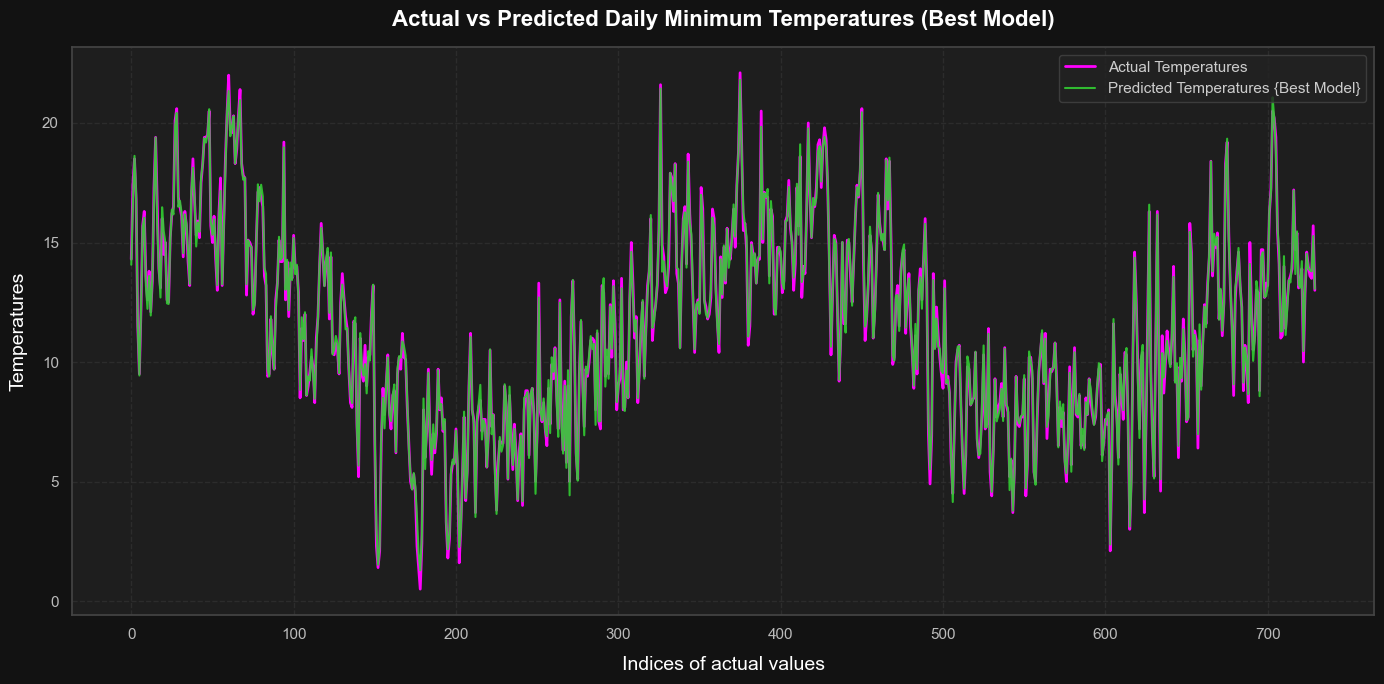

In [290]:
# final visualisation of best model predictions vs actual values
fig, ax = plt.subplots(figsize=(14,7), facecolor='#121212')
ax.set_facecolor('#1e1e1e')

ax.plot(y_test, label='Actual Temperatures', color='#FF00FF', linewidth=2)
ax.plot(y_pred_best, label='Predicted Temperatures {Best Model}', color='#32cd32', alpha=0.9, linewidth=1.5)

ax.grid(color='#333333', linestyle='--', alpha=0.7)

# Style the borders
for spine in ax.spines.values():
    spine.set_color('#444444')

# title and labels
ax.set_title('Actual vs Predicted Daily Minimum Temperatures (Best Model)', color='white', fontsize=16, pad=15, fontweight='bold')
ax.set_xlabel('Indices of actual values', fontsize=14, color='white', labelpad=10)
ax.set_ylabel('Temperatures', fontsize=14, color='white', labelpad=10)

ax.tick_params(colors='#bbbbbb', which='both')

# legends
legend = ax.legend(frameon=True, facecolor='#232323', edgecolor='#444444', loc='upper right')

for text in legend.get_texts():
    text.set_color('#cccccc')

plt.tight_layout()
plt.show()


XGBost Model

In [265]:
# now using XGBoost Model for the same dataset
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target variable

features = ['Year', 'Month_sin', 'Month_cos', 'DayofWeek_sin', 'DayofWeek_cos', 'Rolling Mean 7', 'Rolling Mean 30',
                'Rolling Std 7', 'Rolling Std 30', 'Temp Diff 1d', 'Temp Diff 7d', 'Lag 1', 'Lag 2',
                'Lag 3', 'Lag 7', 'Lag 14', 'Lag 30', 'Season', 'Day Name']

X = new_df[features]
y = new_df['Daily minimum temperatures']


In [266]:
# Scale Numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ], remainder='passthrough' # keep the other columns unchanged
)



In [267]:
# create a pipeline with preprocessing and model
XGB_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.1,
                               n_estimators=100, max_depth=5))
])

In [268]:
# Train the XGBoost model
XGB_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [269]:
# make predictions on test set
y_pred = XGB_pipeline.predict(X_test)

In [270]:
# Calculate the evaluation metrics
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model Performance:\n")
print(f"Mean Squared Error (MSE): {xgb_mse:.4f}\n")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.4f}\n")
print(f"Mean Absolute Error (MAE): {xgb_mae:.4f}\n")
print(f"R2 Score: {xgb_r2:.4f}\n")


XGBoost Model Performance:

Mean Squared Error (MSE): 0.1050

Root Mean Squared Error (RMSE): 0.3241

Mean Absolute Error (MAE): 0.2332

R2 Score: 0.9938



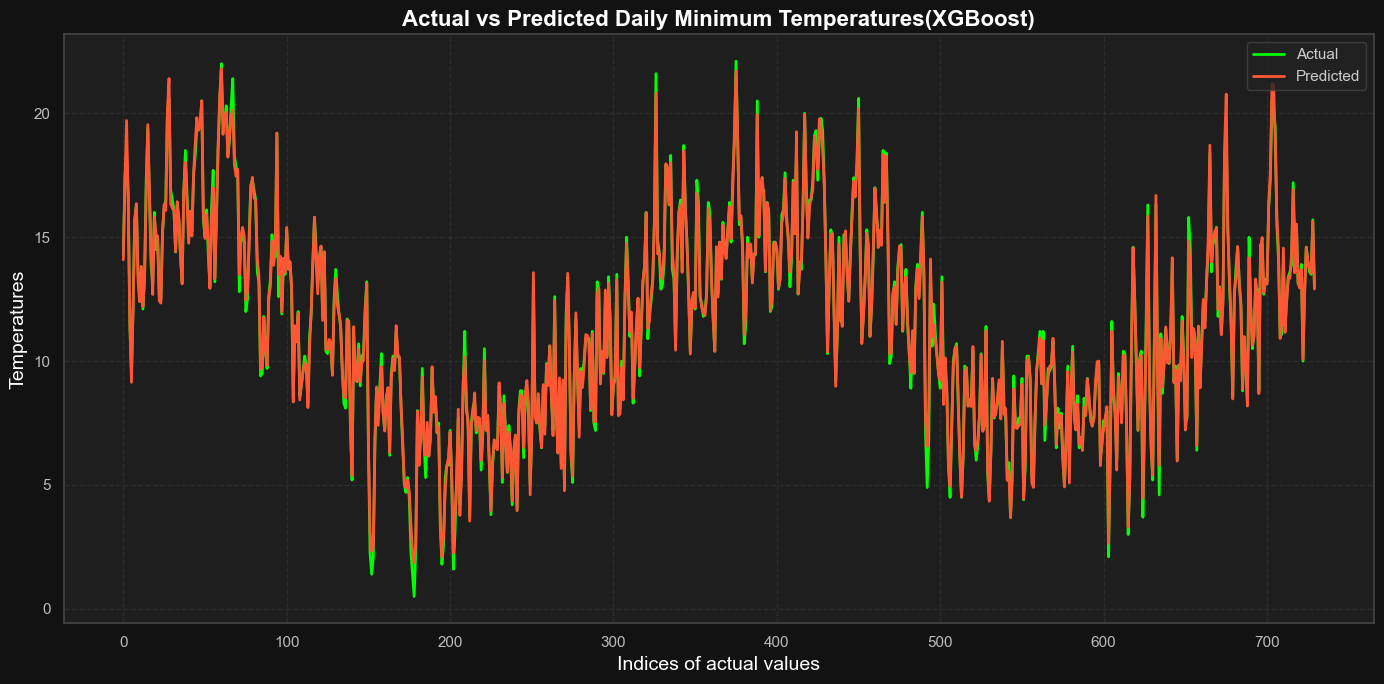

In [291]:
# Viisualise the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,7), facecolor='#121212')
ax.set_facecolor('#1e1e1e')

# plot actual and predicted values
ax.plot(y_test, label='Actual', color='#00ff00', linewidth=2)
ax.plot(y_pred, label='Predicted', color='#ff5733', linewidth=2)

# style the plot
ax.set_title('Actual vs Predicted Daily Minimum Temperatures(XGBoost)', fontsize=16, color='white', fontweight='bold')
ax.set_xlabel('Indices of actual values', fontsize=14, color='white')
ax.set_ylabel('Temperatures', fontsize=14, color='white')
ax.grid(color='#333333', linestyle='--', alpha=0.7)

# style borders
for spine in ax.spines.values():
    spine.set_color('#444444')

# style ticks
ax.tick_params(colors='#bbbbbb', which='both')

# style legend
legend = ax.legend(frameon=True, facecolor='#232323', edgecolor='#444444', loc='upper right')
for text in legend.get_texts():
    text.set_color('#cccccc')

plt.tight_layout()
plt.show()


In [272]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__min_child_weight': [1, 3]
}

# create GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGB_pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# perform grid search
grid_search.fit(X_train, y_train)

print(f"Best XGB parameters: {grid_search.best_params_}")
print(f"Best XGB RMSE: {np.sqrt(-grid_search.best_score_)}")

# get the best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100, model__subsample=1.0; total time=   0.0s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100, model__subsample=0.8; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.01, model__max_depth=3, model__min_child_weight=1, model__n_estimators=100, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__lea

In [273]:
# Evaluate the model on test set
y_pred_best = best_model.predict(X_test)

Best_XGB_MSE = mean_squared_error(y_test, y_pred_best)
Best_XGB_RMSE = np.sqrt(Best_XGB_MSE)
Best_XGB_MAE = mean_absolute_error(y_test, y_pred_best)
Best_XGB_R2 = r2_score(y_test, y_pred_best)

print(f"XGBoost Performance: \n")
print(f"MSE: {Best_XGB_MSE:.4f}\n")
print(f"RMSE: {Best_XGB_RMSE:.4f}\n")
print(f"MAE: {Best_XGB_MAE:.4f}\n")
print(f"R2 Score: {Best_XGB_R2:.4f}\n")

XGBoost Performance: 

MSE: 0.0876

RMSE: 0.2959

MAE: 0.2322

R2 Score: 0.9948



In [294]:
# compare to base model of XGBoost
improvement_mse = ((xgb_mse - Best_XGB_MSE) / xgb_mse) * 100
print(f"Improvement in MSE after Hyperparameter Tuning: {improvement_mse:.2f}%")

improvement_rmse = ((xgb_rmse - Best_XGB_RMSE) / xgb_rmse) * 100
print(f"Improvement in RMSE after Hyperparameter Tuning: {improvement_rmse:.2f}%")

improvement_mae = ((xgb_mae - Best_XGB_MAE) / xgb_mae) * 100
print(f"Improvement in MAE after Hyperparameter Tuning: {improvement_mae:.2f}%")



Improvement in MSE after Hyperparameter Tuning: 16.62%
Improvement in RMSE after Hyperparameter Tuning: 8.68%
Improvement in MAE after Hyperparameter Tuning: 0.42%


In [275]:
# save the best model of XGBoost
import pickle

with open('XGBoost_temeprature_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("XGBoost model saved successfully as 'XGBoost_temperature_model.pkl'")

XGBoost model saved successfully as 'XGBoost_temperature_model.pkl'


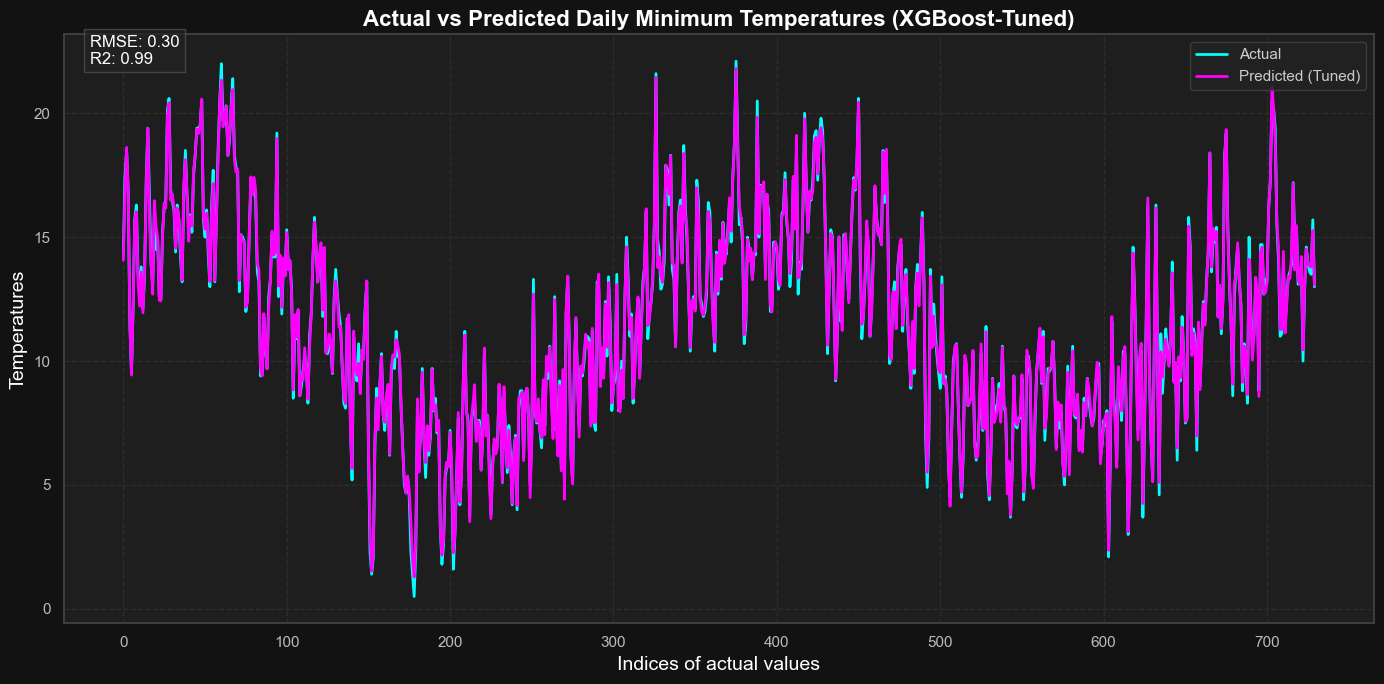

In [300]:
# final visualisation of hyperparameter tuned model (Best Model)
fig, ax = plt.subplots(figsize=(14,7), facecolor='#121212')
ax.set_facecolor('#1e1e1e')

# plot actual and predicted values
ax.plot(y_test, label='Actual', color='#00FFFF', linewidth=2)
ax.plot(y_pred_best, label='Predicted (Tuned)', color='#FF00FF', linewidth=2)

# style the plot
ax.set_title('Actual vs Predicted Daily Minimum Temperatures (XGBoost-Tuned)', fontsize=16, color='white', fontweight='bold')
ax.set_xlabel('Indices of actual values', fontsize=14, color='white')
ax.set_ylabel('Temperatures', fontsize=14, color='white')
ax.grid(color='#333333', linestyle='--', alpha=0.7)

# style the borders
for spine in ax.spines.values():
    spine.set_color('#444444')

# ticks
ax.tick_params(colors='#bbbbbb', which='both')

# add metrics to the plot 
ax.text(0.02, 0.95, f"RMSE: {Best_XGB_RMSE:.2f}\nR2: {Best_XGB_R2:.2f}", transform=ax.transAxes,
        color='white', fontsize=12, bbox=dict(facecolor='#232323', edgecolor='#555555', alpha=0.7))

# legend
legend = ax.legend(frameon=True, facecolor='#232323', edgecolor='#444444', loc='upper right')
for text in legend.get_texts():
    text.set_color('#cccccc')

plt.tight_layout()
plt.show()

In [301]:
# Now comparison LSTM metrics and XGBoost metrics
comparison_df = pd.DataFrame({
    'Model': ['LSTM', 'XGBoost'],
    'MSE': [test_loss, Best_XGB_MSE],
    'RMSE': [np.sqrt(test_loss), Best_XGB_RMSE],
    'MAE': [test_mae, Best_XGB_MAE],
    'R2 Score': [test_r2, Best_XGB_R2]
})

# Determine the best model based on r2 score
best_model_name = comparison_df.loc[comparison_df['R2 Score'].idxmax(), 'Model']
print(f"The best model is: {best_model_name}")

comparison_df

The best model is: LSTM


,Model,MSE,RMSE,MAE,R2 Score
0,LSTM,0.05,0.22,0.17,1.00
1,XGBoost,0.09,0.30,0.23,0.99


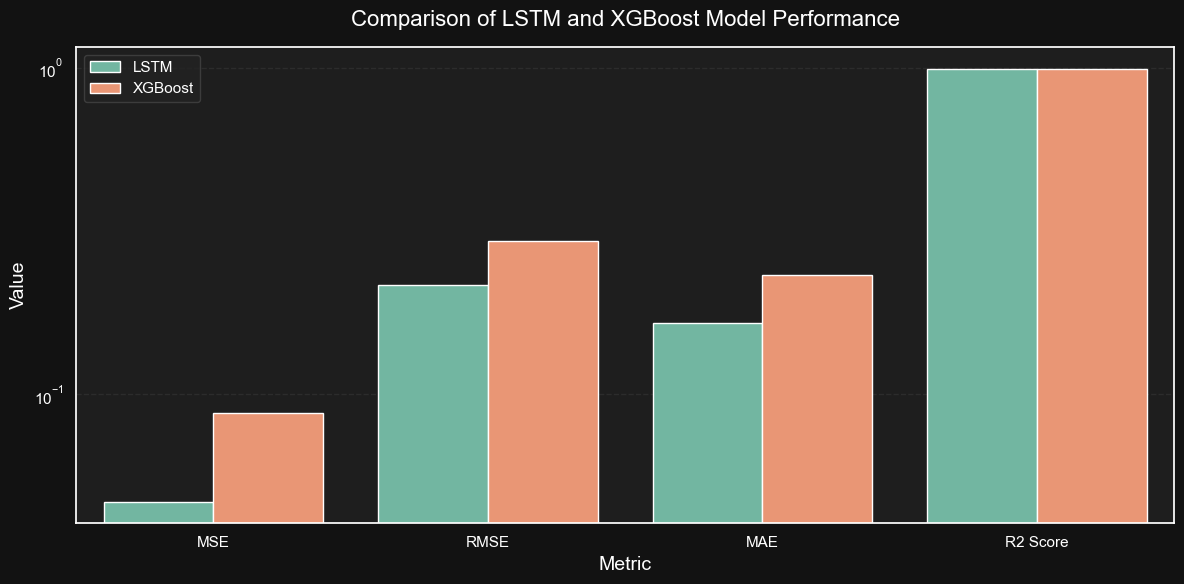

In [281]:
# visualization of comparison between two models in dark visualisation that looks good
comparison_df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(12,6), facecolor='#121212')
ax = plt.axes(facecolor='#1e1e1e')

sns.barplot(x='Metric', y='Value', hue='Model', data=comparison_df_melted, palette='Set2', ax=ax)

plt.title('Comparison of LSTM and XGBoost Model Performance', fontsize=16, color='white', pad=15)
plt.xlabel('Metric', fontsize=14, color='white')
plt.ylabel('Value', fontsize=14, color='white')
plt.yscale('log')  # Use logarithmic scale for better visibility

ax.grid(axis='y', color='#333333', linestyle='--', alpha=0.7)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.tick_params(colors='white')

legend = plt.legend(frameon=True, facecolor='#232323', edgecolor='#444444', loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()
plt.show()